In [22]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
data_path = "/home/maksim/Documents/data_art.csv"
data = pd.read_csv(data_path)

In [7]:
col_to_drop = ["sale_date", "Price","Owner","Size","EstimateFrom","EstimateTo","Time",
            "Description", "tried_url", "Image", "normalized_estimatefrom", 
            "normalized_estimateto"]

data.drop(columns=col_to_drop, inplace=True)

In [8]:
data.loc[data["normalized_price"] == 0, "normalized_price"] = 10**-10 #To take log
data["log10(normalized_price)"] = np.log10(data["normalized_price"]) 
data.drop(columns=["normalized_price"], inplace=True)

In [9]:
data.head()

,Author,Art,Sign,Technique,Material,Nazi,Framed,square_m,Currency,ExhibitedNum,...,number_of_day,day_of_week,month,year,deal_time_(utc),hasFollowers,hasAfter,isUntitled,isNumbered,log10(normalized_price)
0,alberto giacometti,ANNETTE OR PORTRAIT D'ANNETTE AU PULL-OVER ROUGE,1,oil,canvas,0,0,0.2530,GBP,2,...,41,Thursday,2,2011,19:00,0,0,0.0,0.0,6.738088
1,alberto giacometti,ATELIER I,1,oil,canvas,0,0,0.3011,USD,1,...,130,Monday,5,2016,23:00,0,0,0.0,0.0,6.571502
2,alberto giacometti,BUST II,1,lithograph,paper,0,1,0.3290,USD,0,...,123,Friday,5,2013,14:00,0,0,0.0,1.0,3.885481
3,alberto giacometti,BUST OF MAN,1,lithograph,paper,0,1,0.3427,USD,0,...,119,Friday,4,2011,14:00,0,0,0.0,1.0,4.134775
4,alberto giacometti,BUSTE,1,oil,canvas,0,0,0.1544,USD,0,...,312,Wednesday,11,2012,15:00,0,0,0.0,0.0,6.222789


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14536 entries, 0 to 14535
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Author                   14536 non-null  object 
 1   Art                      14536 non-null  object 
 2   Sign                     14536 non-null  int64  
 3   Technique                14536 non-null  object 
 4   Material                 14536 non-null  object 
 5   Nazi                     14536 non-null  int64  
 6   Framed                   14536 non-null  int64  
 7   square_m                 14536 non-null  float64
 8   Currency                 14536 non-null  object 
 9   ExhibitedNum             14536 non-null  int64  
 10  ProvenanceNum            14536 non-null  int64  
 11  LiteratureNum            14536 non-null  int64  
 12  CataloguingLength        14536 non-null  int64  
 13  City                     14535 non-null  object 
 14  date_of_birth         

p-value is 0.06384251376587767


century,19,20
sex,,
F,30,139
M,1697,11697


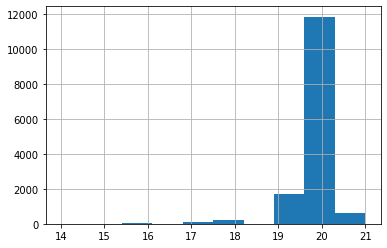

In [11]:
from scipy.stats import chi2_contingency 

data['century'].hist()
data_crosstab = pd.crosstab(data['sex'],  data["century"][ (data["century"]==19) | ( data["century"]==20)], margins = False) 

stat, p, dof, expected = chi2_contingency(data_crosstab) 
print("p-value is {}".format(p))
data_crosstab


In [8]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2)

train_label = train_set["log10(normalized_price)"]
test_label = test_set["log10(normalized_price)"]

train_index = train_set[["Author", "Art"]]
test_index = test_set[["Author", "Art"]]

train_set = train_set.drop(columns=["Author", "Art"]).copy()
test_set = test_set.drop(columns=["Author", "Art"]).copy()

In [9]:
train_set.describe()

,Sign,Nazi,Framed,square_m,ExhibitedNum,ProvenanceNum,LiteratureNum,CataloguingLength,date_of_birth,date_of_death,century,repeat_sale,number_of_day,month,year,hasFollowers,hasAfter,isUntitled,isNumbered,log10(normalized_price)
count,11629.000000,11629.000000,11629.000000,11629.00000,11629.000000,11629.000000,11629.000000,11629.000000,11629.000000,10733.000000,11629.000000,11629.000000,11629.000000,11629.000000,11629.000000,11629.000000,11629.000000,11621.000000,11623.000000,11629.000000
mean,0.875570,0.005933,0.229770,0.55097,1.070255,2.320664,0.983146,9.709605,1889.908505,1961.233020,19.856651,0.925789,188.983318,6.786224,2012.719494,0.015651,0.745206,0.085019,0.258453,5.064257
std,0.330086,0.076803,0.420703,0.94993,2.366555,2.655635,1.940389,219.901558,52.843141,52.575808,0.583281,0.262125,99.931731,3.277402,4.497859,0.124125,0.435764,0.278921,0.437803,1.307657
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1308.000000,1385.000000,14.000000,0.000000,18.000000,1.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,-10.000000
25%,1.000000,0.000000,0.000000,0.13130,0.000000,0.000000,0.000000,0.000000,1876.000000,1954.000000,20.000000,1.000000,97.000000,4.000000,2009.000000,0.000000,0.000000,0.000000,0.000000,4.416220
50%,1.000000,0.000000,0.000000,0.31050,0.000000,2.000000,0.000000,0.000000,1893.000000,1973.000000,20.000000,1.000000,171.000000,6.000000,2013.000000,0.000000,1.000000,0.000000,0.000000,4.994625
75%,1.000000,0.000000,0.000000,0.60980,1.000000,4.000000,1.000000,0.000000,1923.000000,1987.000000,20.000000,1.000000,294.000000,10.000000,2017.000000,0.000000,1.000000,0.000000,1.000000,5.781525
max,1.000000,1.000000,1.000000,28.00000,22.000000,24.000000,22.000000,17296.000000,1965.000000,2019.000000,21.000000,1.000000,353.000000,12.000000,2020.000000,1.000000,1.000000,1.000000,1.000000,7.976563


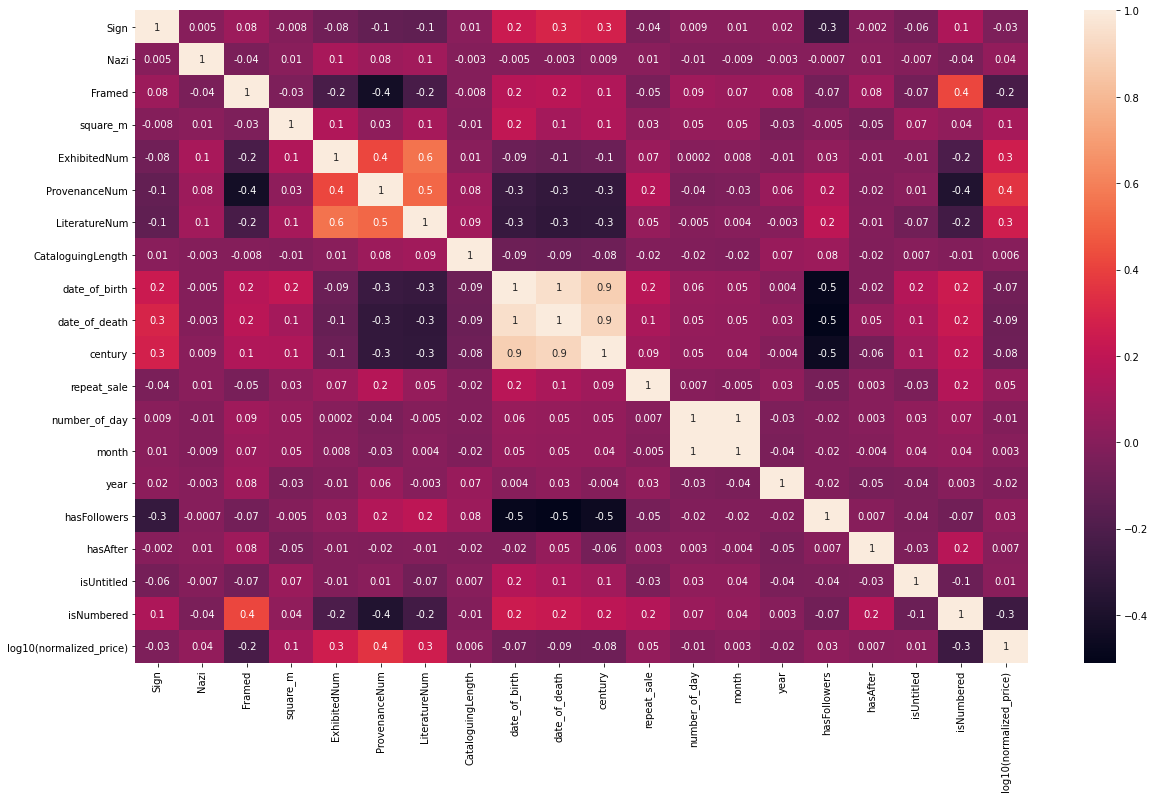

In [10]:
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(train_set.corr(), annot = True, fmt='.1g')
plt.show()

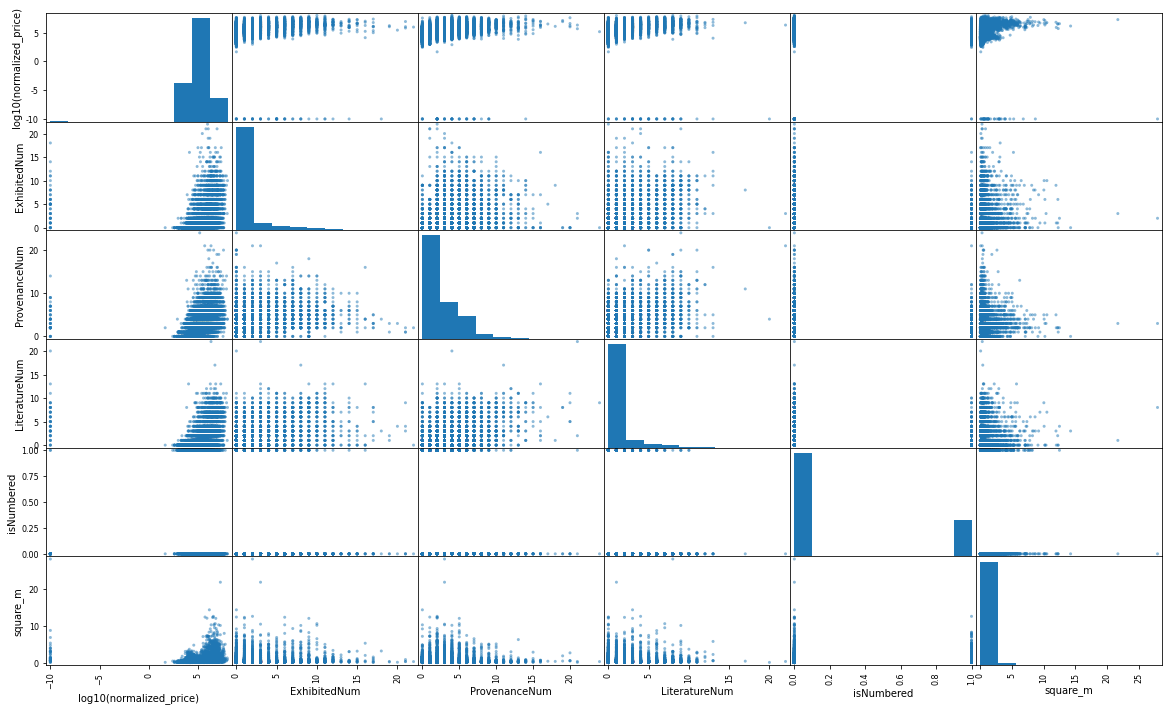

In [11]:
from pandas.plotting import scatter_matrix
attributes = ["log10(normalized_price)", "ExhibitedNum","ProvenanceNum","LiteratureNum","isNumbered","square_m"]
scatter_matrix(train_set[attributes], figsize=(20, 12))
plt.show()

In [12]:
train_set = train_set.drop(columns=["log10(normalized_price)"]).copy()
test_set = test_set.drop(columns=["log10(normalized_price)"]).copy()

data_num = train_set.select_dtypes(include=['int64', 'float64'])
data_cat = train_set.select_dtypes(include='object')

In [13]:
from sklearn.base import BaseEstimator, TransformerMixin


class CreateDummies(BaseEstimator, TransformerMixin):
    def __init__(self,attrib = None):
        pass
    def fit(self, X):
        return self
    def transform(self, X):
        self.attrib =  pd.get_dummies(pd.DataFrame(X)).columns
        return pd.get_dummies(pd.DataFrame(X)).values

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values


In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

    
num_pipeline = Pipeline([
('selector', DataFrameSelector(data_num.columns)),
('imputer', SimpleImputer(strategy="median")),
('std_scaler', StandardScaler()),
])

In [15]:
cat_pipeline = Pipeline([
('selector', DataFrameSelector(data_cat.columns)),
('create_dummies', CreateDummies()),
])

In [16]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
("num_pipeline", num_pipeline),
("cat_pipeline", cat_pipeline),
])

In [17]:
train_prepared = full_pipeline.fit_transform(train_set)
np.shape(train_prepared)

(11629, 223)

***Linear Regression***

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_prepared, train_label)

scores = cross_val_score(lin_reg, train_prepared, train_label,
scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

In [19]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(lin_rmse_scores)

Scores: [1.76798278e+08 2.19761266e+09 3.89893578e+09 2.02319322e+09
 7.01634593e+07 1.10729513e+00 4.86351900e+08 1.03919582e+09
 8.99553249e+08 1.18240564e+00]
Mean: 1079180437.4483554
Standard deviation: 1209960785.037389


***Decision Tree***

In [20]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_prepared, train_label)

scores = cross_val_score(tree_reg, train_prepared, train_label,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [21]:
display_scores(tree_rmse_scores)

Scores: [1.63967081 1.77051252 1.39149488 1.71743974 1.65670604 1.73895276
 1.67780785 1.26022398 1.36384961 1.41027315]
Mean: 1.5626931353524551
Standard deviation: 0.1760071831014953


***Random forest***

In [22]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(train_prepared, train_label)

scores = cross_val_score(forest_reg, train_prepared, train_label,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [23]:
display_scores(tree_rmse_scores)

Scores: [1.09357716 1.39096783 0.73605637 1.0405102  1.15635445 1.21169129
 1.3657013  0.90549587 1.16121196 1.09467122]
Mean: 1.1156237648267933
Standard deviation: 0.18604075299965703


In [24]:
feature_importances = forest_reg.feature_importances_

num_attribs = list(data_num)

cat_attribs = list(cat_pipeline.named_steps["create_dummies"].attrib)
attributes = num_attribs + cat_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.17229790506543663, 'square_m'),
 (0.12334384118993291, 'ProvenanceNum'),
 (0.06987950709969475, 'LiteratureNum'),
 (0.06714527117451236, 'year'),
 (0.06613416211406004, 'ExhibitedNum'),
 (0.03743894616101087, 'number_of_day'),
 (0.02979289152985347, '1_paper'),
 (0.02623877367799307, '0_oil'),
 (0.021451916993623765, '1_canvas'),
 (0.021176485763523555, 'date_of_death'),
 (0.01783332080541742, 'date_of_birth'),
 (0.017623112985397107, '0_lithograph'),
 (0.017472773430354728, '10_24:00:00'),
 (0.01531324130746918, '10_23:00'),
 (0.013498941621735571, 'month'),
 (0.012374619436669619, '9_Monday'),
 (0.010707135662184796, '6_expressionism'),
 (0.010352876268614373, '4_Spaniard'),
 (0.010052387588048264, '6_modern'),
 (0.009378417527835088, '3_hong kong'),
 (0.009244524184297678, '4_Italian'),
 (0.008885583117640814, 'hasAfter'),
 (0.0085019896613744, '9_Tuesday'),
 (0.008110222228970823, '9_Wednesday'),
 (0.007840748968853908, '4_Norwegian'),
 (0.006215724892428465, '8_homosexual'),
 

***Ridge Regression***

In [25]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(train_prepared, train_label)

scores = cross_val_score(ridge_reg, train_prepared, train_label,
scoring="neg_mean_squared_error", cv=10)
ridge_rmse_scores = np.sqrt(-scores)

In [26]:
display_scores(ridge_rmse_scores)

Scores: [1.07497749 1.27297469 0.72544365 1.05334572 1.17606448 1.10529698
 1.39932078 0.9614816  1.15795335 1.17170462]
Mean: 1.1098563358118876
Standard deviation: 0.1717958852239228


***Lasso Regression***

In [27]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(train_prepared, train_label)

scores = cross_val_score(lasso_reg, train_prepared, train_label,
scoring="neg_mean_squared_error", cv=10)
lasso_rmse_scores = np.sqrt(-scores)

In [28]:
display_scores(lasso_rmse_scores)

Scores: [1.1736165  1.34448233 0.85329867 1.13182663 1.24641415 1.15315233
 1.45380138 1.04526695 1.2394662  1.25066339]
Mean: 1.1891988530332038
Standard deviation: 0.15559074393811761


***Elastic Net***

In [29]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(train_prepared, train_label)

scores = cross_val_score(elastic_net, train_prepared, train_label,
scoring="neg_mean_squared_error", cv=10)
elastic_rmse_scores = np.sqrt(-scores)

In [30]:
display_scores(elastic_rmse_scores)

Scores: [1.14776572 1.33644002 0.82104823 1.11016797 1.2206884  1.13508588
 1.4427708  1.02555058 1.21740778 1.23389104]
Mean: 1.1690816434444768
Standard deviation: 0.16091079507367248


In [31]:
import dill
dill.dump_session('Coursework_ml.db')

In [2]:
import dill
dill.load_session('/home/maksim/datasets/Coursework_ml.db')

***Support Vector Poly Regression***

In [2]:
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel="poly", degree=2, C=1, epsilon=0.1)

scores = cross_val_score(svm_poly_reg, train_prepared, train_label,
scoring="neg_mean_squared_error", cv=10)
svm_rmse_scores = np.sqrt(-scores)

In [3]:
display_scores(svm_rmse_scores)

Scores: [1.06511734 1.20258506 0.6693346  1.05498367 1.22027597 1.0730073
 1.42152522 0.94912541 1.14347622 1.16506589]
Mean: 1.0964496689129901
Standard deviation: 0.1861649478892823


***Support Vector Linear Regression***

In [3]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5,max_iter=7600)

scores = cross_val_score(svm_reg, train_prepared, train_label,
scoring="neg_mean_squared_error", cv=10)
svm_rmse_scores = np.sqrt(-scores)

In [4]:
display_scores(svm_rmse_scores)

Scores: [1.12244355 1.27988017 0.78200359 1.09685108 1.21380958 1.12867875
 1.43311805 1.01352729 1.19923026 1.20899892]
Mean: 1.147854124809474
Standard deviation: 0.16280040435735146


**Boost**

In [13]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(train_prepared, train_label)

gbrt = GradientBoostingRegressor(n_estimators=600, 
    max_depth=5, 
    learning_rate=0.01, 
    min_samples_split=3)

gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred)
for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors)
gbrt_best = GradientBoostingRegressor(n_estimators=bst_n_estimators, 
    max_depth=5, 
    learning_rate=0.01, 
    min_samples_split=3)

In [14]:
scores = cross_val_score(gbrt_best, train_prepared, train_label,
scoring="neg_mean_squared_error", cv=10)
gbrt_rmse_scores = np.sqrt(-scores)
display_scores(gbrt_rmse_scores)

Scores: [1.08107954 1.36989044 0.77011465 1.07903118 1.18911345 1.18567624
 1.36426542 0.98098843 1.17377697 1.16417646]
Mean: 1.1358112766309565
Standard deviation: 0.16687769248018233


In [ ]:
gbr = GradientBoostingRegressor(n_estimators=600, 
    max_depth=5, 
    learning_rate=0.01, 
    min_samples_split=3)
